In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers  

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#import data 
data = pd.read_csv("/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
#drop the redundant feature
data.drop('gameId',axis = 1,inplace=True)

In [5]:
# Separate the target Variable
y = data["blueWins"]

In [6]:
#exclude the "blueWins" that is target value from the dataframe and create new dataframe data1 
X = data.drop('blueWins',axis=1,inplace=False)
X.shape

(9879, 38)

<Axes: >

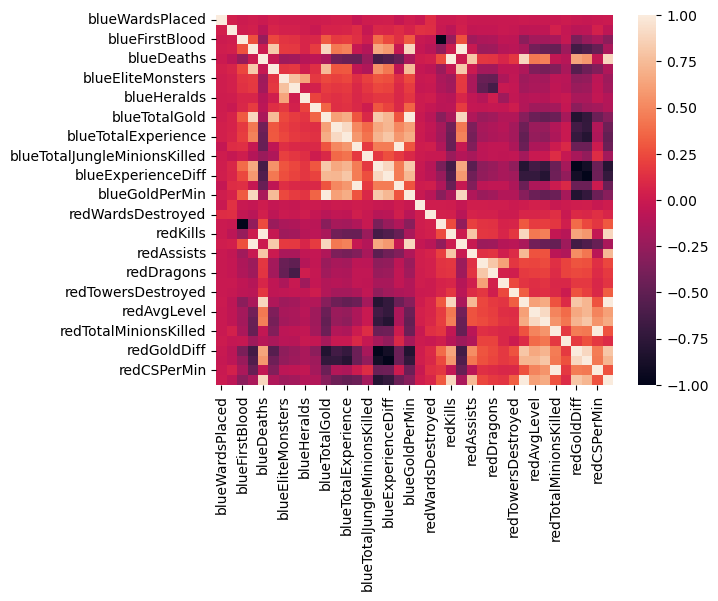

In [7]:
sns.heatmap(X.corr())

In [8]:
train_test_split = 0.7
data_points = X.shape[0]
train_points = int(np.floor(data_points*train_test_split))
test_points = int(np.ceil(data_points - train_points))
print(data_points)
print(train_points)
print(test_points)

9879
6915
2964


In [9]:
#optimizer choosen is adam
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam"
)

In [10]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 32)                1248      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,370
Trainable params: 2,370
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
#split train and test datasets 
X_train = X.iloc[0:train_points,:]
y_train = y.iloc[0:train_points]
X_test = X.iloc[train_points:data_points,:]
y_test = y.iloc[train_points:data_points]

In [13]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    verbose='auto',
    validation_split=0.2,
    shuffle=True
)

Epoch 1/300
173/173 [==============================] - 2s 4ms/step - loss: 82.0417 - accuracy: 0.6453 - val_loss: 42.2260 - val_accuracy: 0.5495
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 18.9854 - accuracy: 0.6372 - val_loss: 19.2548 - val_accuracy: 0.6544
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 15.3298 - accuracy: 0.6379 - val_loss: 13.4116 - val_accuracy: 0.6356
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 12.2984 - accuracy: 0.6363 - val_loss: 16.4482 - val_accuracy: 0.5459
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 11.3902 - accuracy: 0.6282 - val_loss: 25.2757 - val_accuracy: 0.4845
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 12.5113 - accuracy: 0.6423 - val_loss: 5.9909 - val_accuracy: 0.7202
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 8.1731 - accuracy: 0.6405 - val_loss: 44.8149 - val_accu

In [14]:
loss, accuracy = model.evaluate(X_test,y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7328
